In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import scipy
import numpy as np

In [2]:
data = pd.read_csv("./data.csv")
ports = data["Source Port"].unique()
ports = ports[ports !=1883]
data


,No.,Time,Source,Destination,Protocol,Length,Source Port,Message Identifier,Destination Port,Info
0,376,43.636973,192.168.15.6,45.179.91.66,MQTT,89,52623,NaN,1883,Connect Command
1,378,43.652859,192.168.15.6,45.179.91.66,MQTT,354,52623,"1,2",1883,"Subscribe Request (id=1) [devices-1], Publish ..."
2,379,43.652835,45.179.91.66,192.168.15.6,MQTT,70,1883,NaN,52623,Connect Ack
3,381,43.668186,45.179.91.66,192.168.15.6,MQTT,71,1883,1,52623,Subscribe Ack (id=1)
4,383,43.684124,45.179.91.66,192.168.15.6,MQTT,340,1883,2,52623,"Publish Message [devices-1], Publish Ack (id=2)"
...,...,...,...,...,...,...,...,...,...,...
3162,41651,832.615490,45.179.91.66,192.168.15.6,MQTT,68,1883,NaN,60325,Ping Response
3163,41653,832.719069,192.168.15.6,45.179.91.66,MQTT,68,39517,NaN,1883,Ping Request
3164,41654,832.736009,45.179.91.66,192.168.15.6,MQTT,68,1883,NaN,39517,Ping Response
3165,41661,833.293009,192.168.15.6,45.179.91.66,MQTT,68,48589,NaN,1883,Ping Request


In [3]:
devices = {}
#  : devices será um dicionario que irá ter uma chave referente ao device e o valor será um dataframe referente aos respectivos devices 
for port in ports:  
  data = data.loc[ ~(data["Message Identifier"] == "1,2")]
  array_publish = data.loc[data["Source Port"] == port].dropna(subset=['Message Identifier'])
  array_publish_ack = data.loc[data["Destination Port"] == port].dropna(subset=['Message Identifier'])
  device = {"publish":array_publish, "publish_ack" : array_publish_ack}
  devices[port] = device

In [4]:
data = {}
for port in ports:
    RTT = pd.DataFrame(columns=["Time_publish", "Time_ack"])
    for index, row in devices[port]["publish"].iterrows():
        id = int(row["Message Identifier"])
        time_publish = row["Time"]
        RTT.loc[id, "Size_Payload"] = 246 

        RTT.loc[id, "Time_publish"] = time_publish 

    for index, row in devices[port]["publish_ack"].iterrows():
        id = int(row["Message Identifier"])
        time_publish = row["Time"]
        RTT.loc[id, "Time_ack"] = time_publish
    RTT.loc[id, "Time_ack"] = time_publish
    RTT["RTT"]  =(RTT["Time_ack"] - RTT["Time_publish"] )* 1000
    data[port] = RTT


## Medidas de Tendência Central Por Device

In [5]:
i=1
data_mean = []
data_median = []
data_std = []
data_min = []
data_max = []

for port in ports:
  data_mean.append(data[port]["RTT"].mean())
  data_median.append(data[port]["RTT"].mean())
  data_std.append(data[port]["RTT"].mean())
  data_min.append(data[port]["RTT"].mean())
  data_max.append(data[port]["RTT"].mean())

  print("(Device-{})Mean Round Trip Time = {}".format(i ,data[port]["RTT"].mean()))
  print("(Device-{})Median Round Trip Time = {}".format(i ,data[port]["RTT"].median()))
  print("(Device-{})Standard deviation  Round Trip Time = {}".format(i ,data[port]["RTT"].std()))
  print("(Device-{})Min Round Trip Time = {}".format(i ,data[port]["RTT"].min()))
  print("(Device-{})Max Round Trip Time = {}".format(i ,data[port]["RTT"].max()))
  print("---------------------------------------------------------------")

  i+=1

(Device-1)Mean Round Trip Time = 40.87419653266246
(Device-1)Median Round Trip Time = 32.057623000000035
(Device-1)Standard deviation  Round Trip Time = 43.75950056825619
(Device-1)Min Round Trip Time = 29.517669000000524
(Device-1)Max Round Trip Time = 270.2080739999815
---------------------------------------------------------------
(Device-2)Mean Round Trip Time = 32.953947221103135
(Device-2)Median Round Trip Time = 33.01590099999885
(Device-2)Standard deviation  Round Trip Time = 1.4014073971884295
(Device-2)Min Round Trip Time = 30.74590099993202
(Device-2)Max Round Trip Time = 43.15278400002853
---------------------------------------------------------------
(Device-3)Mean Round Trip Time = 33.32014094472223
(Device-3)Median Round Trip Time = 32.811395999999604
(Device-3)Standard deviation  Round Trip Time = 3.435065881392774
(Device-3)Min Round Trip Time = 30.850281999960316
(Device-3)Max Round Trip Time = 72.2356569999647
---------------------------------------------------------

/home/joaog/Desensolvimento/pessoal/tcc/analise-mqtt-iot/iot-analise-tcc/.venv/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


## Medidas de Tendência Central Geral

In [6]:
from statistics import mean 

print("Mean Round Trip Time = {}".format(mean(data_mean)))
print("Median Round Trip Time = {}".format(mean(data_median)))
print("Standard deviation  Round Trip Time = {}".format(mean(data_std)))
print("Min Round Trip Time = {}".format(mean(data_min)))
print("Max Round Trip Time = {}".format(mean(data_max)))


Mean Round Trip Time = nan
Median Round Trip Time = nan
Standard deviation  Round Trip Time = nan
Min Round Trip Time = nan
Max Round Trip Time = nan


/home/joaog/Desensolvimento/pessoal/tcc/analise-mqtt-iot/iot-analise-tcc/.venv/lib/python3.10/site-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


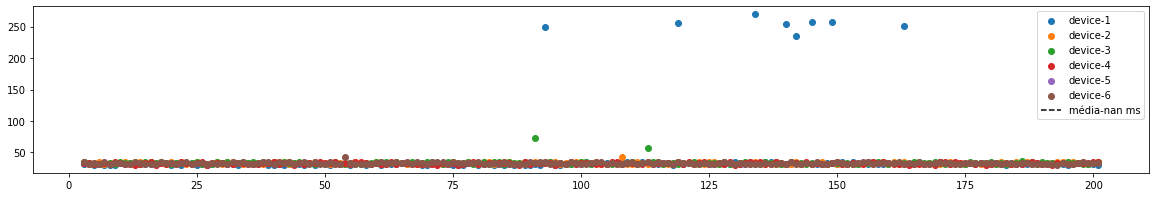

In [7]:
i=1
fig, ax = plt.subplots(figsize=(20,3),dpi=72)
for port in ports:
  data_mean.append(data[port]["RTT"].mean())
  ax.scatter(data[port]["RTT"].index,data[port]["RTT"], label='device-{}'.format(i))
  i+=1
ax.hlines(mean(data_mean), xmax=100, xmin=0, linestyles="dashed", color="black" ,label='média-{} ms'.format(round(mean(data_mean),2)))
ax.legend()




In [8]:
## Analisando outliers
df_novo = {}
for port in ports:
  data[port]
  q3, q1 = np.percentile(data[port]["RTT"], [75, 25])
  interquartil = q3 - q1
  limite_superior =q3 + 1.5 * interquartil
  limite_inferior = q1 - 1.5 * interquartil 
  df_novo[port] = data[port].loc[((data[port]["RTT"]>limite_inferior) & (data[port]["RTT"]<limite_superior))]
  dados_excluidos = data[port]["RTT"].shape[0] - len(df_novo[port])

  print("Nossa nova média é {}" .format(np.mean(df_novo[port]["RTT"])))
  print("Nossa média antiga era {}" .format(np.mean(data[port]["RTT"])))
  print("Foram eliminados o total de {} outliers"  .format(dados_excluidos))
  media =np.mean(df_novo[port]["RTT"])



Nossa nova média é 31.952519722511944
Nossa média antiga era 40.87419653266246
Foram eliminados o total de 10 outliers
Nossa nova média é 32.90243794444189
Nossa média antiga era 32.953947221103135
Foram eliminados o total de 3 outliers
Nossa nova média é 33.00405668527793
Nossa média antiga era 33.32014094472223
Foram eliminados o total de 4 outliers
Nossa nova média é 32.484803708542636
Nossa média antiga era 32.484803708542636
Foram eliminados o total de 2 outliers
Nossa nova média é nan
Nossa média antiga era nan
Foram eliminados o total de 1 outliers
Nossa nova média é 32.67273876767647
Nossa média antiga era 32.72246789949712
Foram eliminados o total de 3 outliers


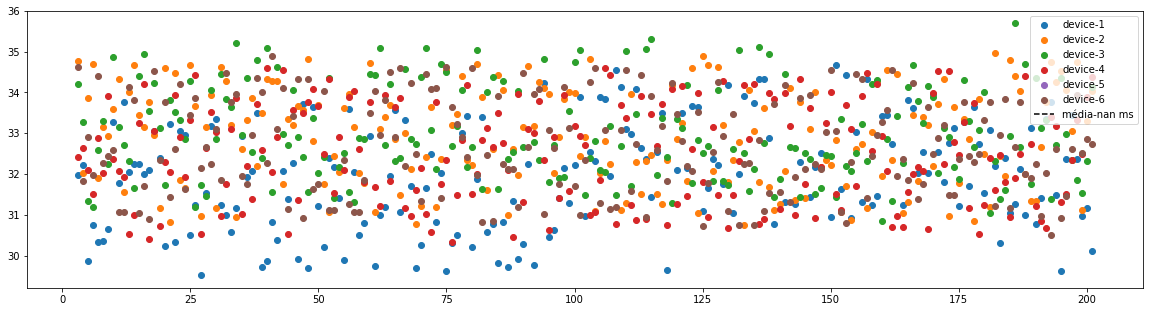

In [9]:
i=1
data_mean_outlier = []
fig, ax = plt.subplots(figsize=(20,5),dpi=72)
for port in ports:
  data_mean_outlier.append(df_novo[port]["RTT"].mean())

  ax.scatter(df_novo[port]["RTT"].index,df_novo[port]["RTT"], label='device-{}'.format(i))
  i+=1

ax.hlines(mean(data_mean), xmax=100, xmin=0, linestyles="dashed", color="black" ,label='média-{} ms'.format(round(mean(data_mean_outlier),2)))
ax.legend()

In [10]:
t = 0
regressao = pd.DataFrame()
for key, value in data.items():
  regressao = pd.concat([regressao,value])

regressao.reset_index()
regressao.to_csv("regressao-5-246-100.csv",index=False)